In [2]:
import cv2


In [ ]:
LpRegion = cv2.imread('./vuong_thang.png')
cv2.imshow('img', LpRegion)
cv2.waitKey(0)
# press q to close opencv window
cv2.destroyAllWindows()


In [13]:
V = cv2.split(cv2.cvtColor(LpRegion, cv2.COLOR_BGR2HSV))[2]


In [14]:
print(V)

[[175 178 178 ...  80  18  14]
 [177 179 178 ...  83  19  11]
 [178 177 176 ...  84  26  15]
 ...
 [222 221 222 ... 222 201 142]
 [220 215 216 ... 220 193 129]
 [225 215 216 ... 199 163 109]]


In [15]:
from skimage.filters import threshold_local

T = threshold_local(V, 15, offset=10, method="gaussian")
thresh = (V > T).astype("uint8") * 255


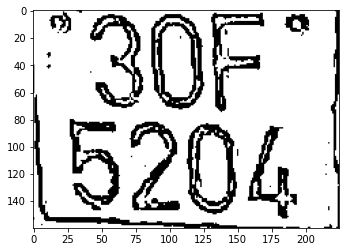

In [16]:
import matplotlib.pyplot as plt

plt.imshow(thresh, cmap="gray")

In [18]:
from skimage import measure
from imutils import perspective
import imutils

# convert black pixel of digits to white pixel
thresh = cv2.bitwise_not(thresh)
cv2.imwrite("step2_2.png", thresh)
thresh = imutils.resize(thresh, width=400)
thresh = cv2.medianBlur(thresh, 5)

# connected components analysis
labels = measure.label(thresh, connectivity=2, background=0)


In [19]:
import numpy as np

In [20]:
# loop over the unique components
for label in np.unique(labels):
   # if this is background label, ignore it
   if label == 0:
      continue

   # init mask to store the location of the character candidates
   mask = np.zeros(thresh.shape, dtype="uint8")
   mask[labels == label] = 255

   # find contours from mask
   contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

   if len(contours) > 0:
     contour = max(contours, key=cv2.contourArea)
     (x, y, w, h) = cv2.boundingRect(contour)

      # rule to determine characters
     aspectRatio = w / float(h)
     solidity = cv2.contourArea(contour) / float(w * h)
     heightRatio = h / float(LpRegion.shape[0])

     if 0.1 < aspectRatio < 1.0 and solidity > 0.1 and 0.35 < heightRatio < 2.0:
            # extract characters
            candidate = np.array(mask[y:y + h, x:x + w])
            square_candidate = convert2Square(candidate)
            square_candidate = cv2.resize(square_candidate, (28, 28), cv2.INTER_AREA)
            square_candidate = square_candidate.reshape((28, 28, 1))
            self.candidates.append((square_candidate, (y, x)))


IndentationError: unexpected indent (4160504139.py, line 19)

In [ ]:
ALPHA_DICT = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'K', 9: 'L', 10: 'M', 11: 'N', 12: 'P',
              13: 'R', 14: 'S', 15: 'T', 16: 'U', 17: 'V', 18: 'X', 19: 'Y', 20: 'Z', 21: '0', 22: '1', 23: '2', 24: '3',
              25: '4', 26: '5', 27: '6', 28: '7', 29: '8', 30: '9', 31: "Background"}


In [ ]:
def _build_model(self):
  # CNN model
  self.model = Sequential()
  self.model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
  self.model.add(Conv2D(32, (3, 3), activation='relu'))
  self.model.add(MaxPooling2D(pool_size=(2, 2)))
  self.model.add(Dropout(0.25))

  self.model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  self.model.add(Conv2D(64, (3, 3), activation='relu'))
  self.model.add(MaxPooling2D(pool_size=(2, 2)))
  self.model.add(Dropout(0.25))

  self.model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
  self.model.add(Conv2D(64, (3, 3), activation='relu'))
  self.model.add(MaxPooling2D(pool_size=(2, 2)))
  self.model.add(Dropout(0.25))

  self.model.add(Flatten())
  self.model.add(Dense(512, activation='relu'))
  self.model.add(Dropout(0.5))
  self.model.add(Dense(32, activation='softmax'))


In [ ]:
def format(self):
  first_line = []
  second_line = []

  for candidate, coordinate in self.candidates:
    if self.candidates[0][1][0] + 40 > coordinate[0]:
        first_line.append((candidate, coordinate[1]))
    else:
        second_line.append((candidate, coordinate[1]))

  def take_second(s):
    return s[1]

  first_line = sorted(first_line, key=take_second)
  second_line = sorted(second_line, key=take_second)

  if len(second_line) == 0:  # if license plate has 1 line
     license_plate = "".join([str(ele[0]) for ele in first_line])
  else:   # if license plate has 2 lines
     license_plate = "".join([str(ele[0]) for ele in first_line]) + "-" + "".join([str(ele[0]) for ele in second_line])

  return license_plate
